In [1]:
import matplotlib.pyplot as plt
from qiskit.visualization import plot_histogram

# Numpy statevector simulator


Numpy is the core library for scientific computing in Python. Some key highlights of numpy:
* Python library containing math functions
* Written in C so it runs really fast!
* Contains lots of helper functions allowing for shorter, more readable code
* Contains fantastic documentation. [Numpy documentation](https://numpy.org/doc/stable/).

While not required, the general consensus is to import the whole numpy library and set it as the name `np`:

In [2]:
import numpy as np

## Arrays

Numpy provides a high-performance multidimensional array object, and tools for working with these arrays.



In [3]:
# Python List (mutable)
example_list = [0,1,2,3,4]

numpy_list = np.array(example_list)

print(example_list)
print(numpy_list)

[0, 1, 2, 3, 4]
[0 1 2 3 4]


# Vectors

Arrays, matrices, and vectors are one and the same - it all has to do with dimension and space

1 Dimension = Array

2 Dimension = Vector or Matrix

### Example 1

Dimension of A = (2,1):

$$
\begin{bmatrix}
12 \\
20
\end{bmatrix}
$$

A is therefore a column vector as the the Column dimensions = 1

### Example 2

Dimension of B = (2,2):

$$
\begin{bmatrix}
5 & 8 \\
12 & 2
\end{bmatrix}
$$

B is therefore a Matrix as the the Column  dimensions = 2, and the Row dimensions = 2


## Making Vectors in Numpy

```python
vector_name = np.array([[Value],
                        [Value]])
```

In [15]:
vector1 = np.array([[1],
                    [0],
                    [1]])
vector1

array([[1],
       [0],
       [1]])

## Making Matrices in Numpy

```python
matrix_name = np.array([[row],
                        [row]])
```

In [14]:
matrix1 = np.array([[1, 0, 1],
                    [0, 1, 0],
                    [1, 0, 1]])
matrix1

array([[1, 0, 1],
       [0, 1, 0],
       [1, 0, 1]])

In [12]:
# Make it as a python list first!
plist = [[0,1,0],
         [1,0,1],
         [4,5,4]]



# Multiplying Matrices

In [16]:
# Let's take another look at our matrix1 and vector1 from above
print("matrix 1: ")
display(matrix1)
print("vector 1: ")
display(vector1)

matrix 1: 


array([[1, 0, 1],
       [0, 1, 0],
       [1, 0, 1]])

vector 1: 


array([[1],
       [0],
       [1]])

# Dot Product

In [18]:
vector2 = np.array([[0],
                    [1]])

In [24]:
print(f"shape of matrix1 {matrix1.shape}")
print(f"shape of vector2 {vector2.shape}")
print(f"M x N Matrix can dot with and N x L vector")

shape of matrix1 (3, 3)
shape of vector2 (2, 1)
M x N Matrix can dot with and N x L vector


In [26]:
np.dot(matrix1, vector1)

array([[2],
       [0],
       [2]])

---

# Cool, So let's do some Quantum Computing with that!
---

## Make the X Gate

$$
\begin{bmatrix}
0 & 1 \\
1 & 0 
\end{bmatrix}
$$

In [27]:
X = np.array([[0, 1],
              [1, 0]])

## Make the Y Gate
$$
\begin{bmatrix}
0 & -i \\
i & 0 
\end{bmatrix}
$$

In [30]:
Y = np.array([[0, -1j],
              [1j, 0]])

## Make the Z Gate

$$
\begin{bmatrix}
1 & 0 \\
0 & -1 
\end{bmatrix}
$$

In [31]:
Z = np.array([[1, 0],
              [0, -1]])

## Make the H Gate

$$
\frac{1}{\sqrt{2}}
\begin{bmatrix}
1 & 1 \\
1 & -1 
\end{bmatrix}
$$

In [32]:
H = (1/np.sqrt(2)) * np.array([[1, 1],
              [1, -1]])

# Make the $\lvert 0 \rangle$ State

$$
\begin{bmatrix}
1 \\
0 
\end{bmatrix}
$$

In [34]:
basis_state = np.array([[1],
                        [0]])

# Make a gate application function

In [39]:
def apply_gate(gate, state):
    out_state = np.dot(gate, state)
    return out_state

In [40]:
apply_gate(X, basis_state)

array([[0],
       [1]])

# Make a function that converts statevectors to probabilities

In [100]:
def convert(statevector):
    probability_vector = []
    for row in statevector:
        for value in row:
            probability = np.power(np.abs(value), 2)
            probability_vector.append(probability)
                
    return np.array(probability_vector)

### Test out our convert function

In [57]:
# Use our apply_gate function defined above
# Apply the H gate to the basis_state(a.k.a \0> state)
plus_state = apply_gate(H, basis_state)

# dislay (aka print) the output of plus state
display(plus_state)

probability_vec = convert(plus_state)
display(probability_vec)

array([[0.70710678],
       [0.70710678]])

array([0.5, 0.5])

### Same as the convert above but using vectorized functions

In [101]:
def pro_convert(statevector):
    # This is exactly the same as convert but in vectorized form
    return np.power(np.abs(statevector), 2)

In [106]:
pro_convert(apply_gate(H, basis_state))

array([[0.5],
       [0.5]])

# Make a function that plots Statevectors as Probability histograms

In [66]:
def create_histogram(prob_vec):
    fig, ax = plt.subplots()
    labels = ["0","1"]
    heights = prob_vec.reshape(-1)
    ax.bar(labels, heights)
    ax.set_title("Probability of 0 and 1 measurements")
    ax.set_xlabel("States")
    ax.set_ylabel("Probability")
    ax.set_ylim([0,1])
    plt.show()

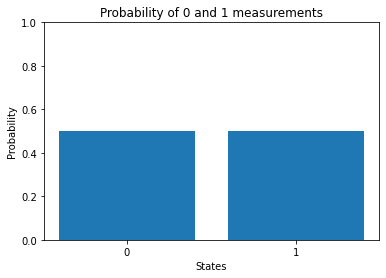

In [67]:
state = apply_gate(H, basis_state)
prob_vec = pro_convert(state)
create_histogram(prob_vec)

In [90]:
def execute(gate_list, shots=1000):
    # 1. Create the single qubit circuit
    qubit = np.array([[1],
                      [0]])
    # 2. Calculate the statevector of that circuit
    for gate in gate_list:
        qubit = apply_gate(gate, qubit)
    # 3. Pick a state, given the probability 
    #       distribution (repeat this = no. of shots)
    probs = convert(qubit).reshape(-1)
    
    # 4. Record the counts of each state
    counts = {"0": 0, "1": 0}
    for i in range(shots):
        pick = np.random.choice(["0","1"], p=probs)
        counts[pick] += 1
    
    return counts

In [91]:
counts = execute([H, Z], shots=2000)

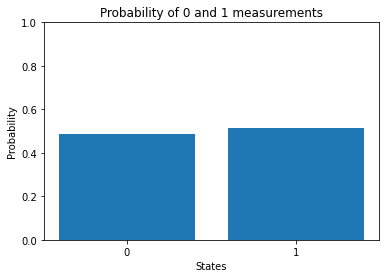

In [99]:
ls = list(counts.values())
probs = ls/np.sum(ls)
create_histogram(probs)

## Showing why we do not need to reverse:

In [83]:
# gate_list = [H, Z, Y, X]

init_state = np.array([[1],
                       [0]])

state = np.dot(H, init_state)
state = np.dot(Z, state)
state = np.dot(Y, state)
state = np.dot(X, state)

state2 = np.dot(X, np.dot(Y, np.dot(Z, np.dot(H, init_state))))

if np.array_equal(state, state2):
    print("Yay")
else:
    print("uh oh")
    print(state)
    print(state2)

Yay


### © 2022 The Coding School

**All rights reserved**

*Use of this activity is for personal use only. Copying, reproducing, distributing, posting or sharing this activity in any manner with any third party are prohibited under the terms of this registration. All rights not specifically licensed under the registration are reserved.*